# More Modelling (XG-Boost and maybe CNNs)

In [1]:
# Importing the holy quartet of libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Library for importing and opening images
from PIL import Image

# SKLEARN Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Importing the os library to navigate directories to access the data
import os

In [2]:
# Displaying the different classes of images
Category_List = os.listdir('data/raw')
Category_List

['Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Ependimoma T1',
 'Ependimoma T1C+',
 'Ependimoma T2',
 'Ganglioglioma T1',
 'Ganglioglioma T1C+',
 'Ganglioglioma T2',
 'Germinoma T1',
 'Germinoma T1C+',
 'Germinoma T2',
 'Glioblastoma T1',
 'Glioblastoma T1C+',
 'Glioblastoma T2',
 'Granuloma T1',
 'Granuloma T1C+',
 'Granuloma T2',
 'Meduloblastoma T1',
 'Meduloblastoma T1C+',
 'Meduloblastoma T2',
 'Meningioma T1',
 'Meningioma T1C+',
 'Meningioma T2',
 'Neurocitoma T1',
 'Neurocitoma T1C+',
 'Neurocitoma T2',
 'Oligodendroglioma T1',
 'Oligodendroglioma T1C+',
 'Oligodendroglioma T2',
 'Papiloma T1',
 'Papiloma T1C+',
 'Papiloma T2',
 'Schwannoma T1',
 'Schwannoma T1C+',
 'Schwannoma T2',
 'Tuberculoma T1',
 'Tuberculoma T1C+',
 'Tuberculoma T2',
 '_NORMAL T1',
 '_NORMAL T2']

In [3]:
file_paths = {}
for category in Category_List:
    file_paths[category] = []
    for file in os.listdir(f'data/raw/{category}'):
       # print(f'data/raw/{category}/{file}')
        
        file_paths[category].append(f'data/raw/{category}/{file}')
file_paths

{'Astrocitoma T1': ['data/raw/Astrocitoma T1/005_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/006_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5d8520f5a0500e22624a400948250b05f2ae0a1f177_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/02df132a56dfb89ece42ee8d195a16_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/044d8d9984902ca03e652a6f042c57_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/05899aa824a60c863097d3c9105009c18e25246abea155839c216ceab0273a18_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/0c14dccd685d7ce330d14fa7a1f53dc756e73aff2f03afc1b09a7efc410f1804_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/1492ae4325c115eccae71ebb3e995907dbef123dfd9ed8a32d7f8a64bb03115b_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/18e851456478d638929d5109489574_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/1b829d504373126112d3a30ca488a6_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/1c0238417532d40ffca1c26042

In [4]:
imgs = []
classification = []
file_names = []
for key, item in file_paths.items():
    
    for file_name in item:
        print(key, file_name)
        
        # Opening the images
        img = Image.open(file_name)
        
        # Resizing the images to 224x224
        img = img.resize((224, 224))
        
        # Converting images to grayscale
        img = img.convert(mode='L')
        
        # Loading the normalized image
        load_img = np.asarray(img)
        
        # then append grey images
        file_names.append(file_name)
        imgs.append(load_img)
        classification.append(key)

Astrocitoma T1 data/raw/Astrocitoma T1/005_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/006_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5d8520f5a0500e22624a400948250b05f2ae0a1f177_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/02df132a56dfb89ece42ee8d195a16_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/044d8d9984902ca03e652a6f042c57_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/05899aa824a60c863097d3c9105009c18e25246abea155839c216ceab0273a18_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/0c14dccd685d7ce330d14fa7a1f53dc756e73aff2f03afc1b09a7efc410f1804_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/1492ae4325c115eccae71ebb3e995907dbef123dfd9ed8a32d7f8a64bb03115b_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/18e851456478d638929d5109489574_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/1b829d504

Astrocitoma T1 data/raw/Astrocitoma T1/ab79c8df3e061b384fed723673e83cad4445bfd967934ce9e2a8a9e611dc504c_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/ac993875b9ff6a14aaa1b0bc7a7cef_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/ae69e7f2ddfaffeaefae370665e55df2d62eb1309ba41bb60c277d4ee277c864_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/af2f1d6497d150ad7655f2828abba7_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (1).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (1).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (10).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (10).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (11).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (11).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (12).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (12).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (13).jpeg
Astrocitoma T1 data/raw/Astrocit

Astrocitoma T1C+ data/raw/Astrocitoma T1C+/158c06b16914d216641ccae5b41c37_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/17c12db56fa89df2974e53e2a0ff7d_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1808d422d0674d44d96e5b09843d4f_big_gallery.jpg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1d462b782da501f4711bb35a423188_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1eb0bce38c890f4c047106e4bf54f5_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1eb857898f23c20fb29fe1df8a89b7_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1f1291f56ed59c15a34e1d62d40f8f94bfbcecefd622850ad02d5392db3ec492_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1fb76d642372c66de505a65cc14e39_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/201a254d0f7bb402c01a62a881c584d4b1a1dfd716730932a5cde7d730d98661_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/2022-06-07 13_30_45-Window.jpg
Astrocitoma T1C+ data/raw/Astrocitoma T1

Astrocitoma T1C+ data/raw/Astrocitoma T1C+/74797d1ba15d11a55fae9538e0f532_big_gallery.jpg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/7a97edfd6cc75ee08965c8cd85d702_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/7c05df74ff527c05aa76de15b47a95_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/7d10162abb593d0fd850f12045b36709240728e316d34a330c30359bcab42fc7_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/84e0ae1f9cea050b250cb083a21597_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/864e82fca047275ce43ca01079525a61510a51d542b26d66e81faba16236dca2_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/8669c62c9962a20c12d5b56000df08_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/878dddce95d254f36973e91d946c32f1ccd5d2c86ea05ee104d70cfd652a6574_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/887398399e0b2a3b185d5da11bab87_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/8d29025dd5867c3459d8af73fbc5b6_big_ga

Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IMG-0010-00010_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IMG-0010-00011_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IMG-0010-00012_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/006be184fb63e8806d40bc970ff4d6_big_gallery.jpg
Astrocitoma T2 data/raw/Astrocitoma T2/007_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/008_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/009_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/010_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/011_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/0540bf7f7f3e549bd53f4c1df47d7c_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/0680c9ccc69483f0ef0e96aff52333_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/07bee41228cffe84d711bb25d9f980_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/08a833668292e2d8626f3df1ed711b_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/09

Astrocitoma T2 data/raw/Astrocitoma T2/909fed3bf9593bef90877df86ef334_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/90c5d15068382014b952a24c570761121857268fdcf91fdc850f625aa3aab952_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/9157ef51410e77ad7b202f7fc545d0aeb8dfd36588adf8988344ae9bc49c66d6_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/915ac6b86f7ca21449241901cb8bdb_big_gallery.jpg
Astrocitoma T2 data/raw/Astrocitoma T2/9355d15cf17eeed1382eee15afdb90_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/988f49c82ec70c974801ec3a39db9b_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/992becd63a8141cb6844b0ab7158ce_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/9e605d7a0dfd25806e53a40cb3822c_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/9eb38f0096f2518fe32fc949d594b9_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/9f06036b3940b4234552f420783b8d_big_gallery.jpg
Astrocitoma T2 data/raw/Astrocitoma T2/a3b6ded68ff71b6f59cd7a943

Carcinoma T1 data/raw/Carcinoma T1/76._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/77._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/78._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/79._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/7d57c1d29ca3e26f8241e6a5265432_big_gallery.jpg
Carcinoma T1 data/raw/Carcinoma T1/80._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/81._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/82._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/83._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/84._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/85._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/86._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/87._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/88._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/888309b872af125cf0d008984115f17474da49131323975546c8b70af0a3d33f_big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/89._big_gallery.jpeg
Carcinoma T1 data

Carcinoma T2 data/raw/Carcinoma T2/107._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/108._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/109._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/110._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/111._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/112._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/113._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/114._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/115._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/116._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/117._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/118._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/119._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/120._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/121._big_gallery.jpeg
Carcinoma T2 data/raw/Carcinoma T2/2022-06-09 14_11_03-Window.jpg
Carcinoma T2 data/raw/Carcinoma T2/2022-06-09 14_11_08-Window.jpg
Carcinoma T2 

Ependimoma T1C+ data/raw/Ependimoma T1C+/4747e702d32f87879a5af404611f9d_big_gallery.jpg
Ependimoma T1C+ data/raw/Ependimoma T1C+/4a65a66afd8f77ed5ef1536a1423c6_big_gallery.jpeg
Ependimoma T1C+ data/raw/Ependimoma T1C+/4da8faa91e1524a12e0015ec8be179_big_gallery.jpeg
Ependimoma T1C+ data/raw/Ependimoma T1C+/4e16788043e7adfc35f8563e346224_big_gallery.jpg
Ependimoma T1C+ data/raw/Ependimoma T1C+/515251f70ae06dc3a781493e95962e_big_gallery.jpeg
Ependimoma T1C+ data/raw/Ependimoma T1C+/55c0ada3cbc129a4908259561cbc07_big_gallery.jpeg
Ependimoma T1C+ data/raw/Ependimoma T1C+/575c77689892631f9a4f1643ac7f8e_big_gallery.jpeg
Ependimoma T1C+ data/raw/Ependimoma T1C+/5f876ee46dba63786b3bcf71193ff6_big_gallery.jpeg
Ependimoma T1C+ data/raw/Ependimoma T1C+/61648b2cdd57087288efa51b2dab30_big_gallery.jpg
Ependimoma T1C+ data/raw/Ependimoma T1C+/65ebe5d5db04fbfa90fe5333ac5e21_big_gallery.jpeg
Ependimoma T1C+ data/raw/Ependimoma T1C+/6cdbe0b8c0b17eb7d02bfbb88b704b_big_gallery.jpg
Ependimoma T1C+ data/raw/

Ganglioglioma T1 data/raw/Ganglioglioma T1/87ecc2ae10d82abda431e51c3198f9_big_gallery.jpg
Ganglioglioma T1 data/raw/Ganglioglioma T1/a2001f1ca13c214d98c31c894aa588_big_gallery.jpg
Ganglioglioma T1 data/raw/Ganglioglioma T1/a62d2a0098d76c09d2690dad9f95d7_big_gallery.jpg
Ganglioglioma T1 data/raw/Ganglioglioma T1/bb52c86460a3c06f837918fe74b529_big_gallery.jpg
Ganglioglioma T1 data/raw/Ganglioglioma T1/bc048b5e260f4a08ec39a5632fa8b0_big_gallery.jpg
Ganglioglioma T1 data/raw/Ganglioglioma T1/bfb29575257618fc0e663524407609_big_gallery.jpg
Ganglioglioma T1 data/raw/Ganglioglioma T1/c5f1de98c80b12e2142f91b3adc1f8_big_gallery.jpg
Ganglioglioma T1 data/raw/Ganglioglioma T1/dfba4edce76806cd55822222ff7d54_big_gallery.jpg
Ganglioglioma T1C+ data/raw/Ganglioglioma T1C+/0d2b1a33f7f5ed1489ef8d1ae24f4f_big_gallery.jpg
Ganglioglioma T1C+ data/raw/Ganglioglioma T1C+/1.2.840.113619.2.80.3040119935.17384.1613989624.10_big_gallery.jpeg
Ganglioglioma T1C+ data/raw/Ganglioglioma T1C+/1.2.840.113619.2.80.3040

Germinoma T1C+ data/raw/Germinoma T1C+/63dbca519e997b201855b3de140839_big_gallery.JPG
Germinoma T1C+ data/raw/Germinoma T1C+/65_big_gallery.jpeg
Germinoma T1C+ data/raw/Germinoma T1C+/67_big_gallery.jpeg
Germinoma T1C+ data/raw/Germinoma T1C+/69_big_gallery.jpeg
Germinoma T1C+ data/raw/Germinoma T1C+/70522a5dcf2a82fc6ef0f6fc7c7db3_big_gallery.jpg
Germinoma T1C+ data/raw/Germinoma T1C+/71_big_gallery.jpeg
Germinoma T1C+ data/raw/Germinoma T1C+/7c0ad82f17b6def88ff93aca761a85_big_gallery.jpeg
Germinoma T1C+ data/raw/Germinoma T1C+/85b108250d37c6c5a0b6f084f9619e_big_gallery.JPG
Germinoma T1C+ data/raw/Germinoma T1C+/8b214ed3be3192094c67b073f870fa_big_gallery.jpeg
Germinoma T1C+ data/raw/Germinoma T1C+/937665ab1248c1e81453e2f6de546d_big_gallery.jpeg
Germinoma T1C+ data/raw/Germinoma T1C+/93fbafbfa2d4922306d7d6ef090cc1_big_gallery.jpeg
Germinoma T1C+ data/raw/Germinoma T1C+/9c19115cf56512c3ad837dbe5698ad_big_gallery.jpg
Germinoma T1C+ data/raw/Germinoma T1C+/9e4ca96ef6640877f1252c4da39ed6_bi

Glioblastoma T1 data/raw/Glioblastoma T1/d03f394f7f25cc95f6a1b38414a64d7f3a4c9cd3ee5b47c6d03e70f03f98dd9a_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/d5a62463f4a62c40dc14cda8bb64fbdd4d99b467f4c6a96c686266b450b4dfee_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/d74bcc5637aa9ccecfc4539b400b3206e387426c63556d18d99404e0a5335dba_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/d81ed0784375ea66a88842eab5630f_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/d8439c90604d81d327dee8ba875b3da698e0ba489e1f08327d2099e2d86c467f_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/d9906cdd3caf9ceda279703f6a6a80e8f7bdce40d925ea2ae2693e326b1be90e_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/ee67bba533ff3a89050131a8f2b575_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/f4485ed1d0a1dbe3db16704b62c74cb3654a9717815db4c2179ead98790783a8_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/f5e45a11633a611d9190f9564ecb3f9d01686b7dd25

Glioblastoma T1C+ data/raw/Glioblastoma T1C+/a6ca68ffbb01d18fc4c59eb539e17466f3b6acee7814b492bcbdbde29d24faac_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/a6d8cff8aadea263e22ddceedc24373734c7751f6283094960bc9d7f6970dc84_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/a82902a3ee8e2380482aa4759d7bed_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/a8db9184959c75876229ee312057a4d990b0bbb026a4cab69978fc9f68b74e2c_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/b425c50c972f18df2668cf5d5f73c3653d734cf6422b9e8e74285ead2fe159f5_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/b91c6310d605c675689cecc7657309_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/bc2d0c30cd3a66ed39b6e7d15cbc6e_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/be6b2aec93e44edd9e209d945399167f53a2120a442b2c55449d72793a246cca_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/c23acc2a7d8121772401eb6e0935a1_big_galler

Granuloma T1 data/raw/Granuloma T1/00bd904e2327a741c24d98532ec44f_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/052d675f1083d53187612c23128e4a_big_gallery.jpg
Granuloma T1 data/raw/Granuloma T1/0cc030e3fdba77d364c6f02a594cf4_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/0feaabef30a5b792f03f8dff1f8f18_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/1a95d597498c3ed1192833f86df0e3_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/29e8f9ff40e12850a4a507fcb4d701_big_gallery.jpg
Granuloma T1 data/raw/Granuloma T1/2e67484596f5645197af4576032d79_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/30c24f44e3785e6e410bb914923c2e_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/459d57445d4517c7efb47d6a0641de_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/4b09114b5492d7a6339b1310926f26_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/51._big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/52._big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/53._big_gallery.jpeg
Gran

Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/15b3f2891dbda27ebd8aa8670a80b6dde8f207d4e7aa67bc54c00ac828bf56f8_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/15eb14e73d0f8a02a969c23f81b74b0228dc39260cbd4221c75e36a2ef3ef3e4_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/1637bfb735de96a0569cc7b3d53ebd_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/17d901a841ca955a335b56dcca16724e540df7581c4744b5f8941b7c8c25746a_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/2ab421222ccaad391dcf890dc0e452f0d242aaab64c60e1a2272742a628664c2_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/2c2836df1b4de4232eb01f6c99a2fff1e46ceaa7c633eca7cee228f99cf64e98_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/3070f6f4378f56946021466a0898ff90bc7c601bee1a3574c185d64e32de3a4a_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/3254c849b3a6655a340695da560f37_big_gallery.jpeg
Meduloblastoma T1C+ 

Meduloblastoma T2 data/raw/Meduloblastoma T2/7._big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/75fbcf835e5b54fa024bae83a00fe2_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/77b23a89030202a6b4a8d05f8807d8_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/8._big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/817f1fb2ee38473e3d3fb0d367a13875b8f6c34b81c598d45a15712dc91ca521_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/8b34ff0e16864b5c022ac0a7ea6c57dcee959c3f99485c6086530712a96b44fa_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/9._big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/9003f5335df91d806f7f500ce09263_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/91ad20d5cd7c811a5a8a1f567567855111f0a0b5324457fa69b845cb785d35b9_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/97144e74acea52db504855e1375abe_big_gallery.jpg
Meduloblastoma T2 data/raw/Meduloblastoma T2/9b82f7a5

Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_17_15-Meningothelial meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_17_21-Meningothelial meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_17_22-Meningothelial meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_17_23-Meningothelial meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_17_24-Meningothelial meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_22_03-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_22_09-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_22_10-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Menin

Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_33_39-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_33_44-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_33_48-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_33_51-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_33_55-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_33_59-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_45_13-Pineal region meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_45_19-Pineal region meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-31 15_4

Meningioma T1 data/raw/Meningioma T1/ac89541c3b18994189360bb90cf3c694e01ab39aa12c17bb3e192258cbb1f3ca_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/ad00fed6c79280691adb3f02a7bf15_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/ad6179fc3592241dd344736013fb98aebd89d37dcd38beb7b779b170839a791f_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/adbf9c00f27087643517a6ac756779_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b10d25e2215312fea4c9865ddaa9d2_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b15b78187a9c76bb0c8d9ee09b310f11642fb58ba7391fae80007cc50b06fdb7_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b415913de4c64902a43e6cc47d1cf1f340cef2760d69093a54400dff9cb86c3e_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b420e0efb9958248233f36f4482d50_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b45132cc49fc4933535c26d341b606416cf3aa7a915a69b133a72a04ea39c2d7_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/b4bd16019ce9ba8ab8aaa056f505

Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_09-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_10-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_11-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_12-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_13-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_14-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_55_15-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_57_47-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05

Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 11_11_48-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 11_11_49-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 11_11_51-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_13_58-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_14_09-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_14_10-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_14_11-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_16_24-Microcystic meningioma _ Radiology Case _ Radiopaedia.o

Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_31_16-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_19-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_28-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_30-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_31-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_32-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_33-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_43_34-Atypical meningioma _ Radiology Case _ Radiopaedia.o

Meningioma T1C+ data/raw/Meningioma T1C+/66f6d32f766e2bb3d78103c58b84cb_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/67abeeb87dc9b27b76ae13895e1331_big_gallery.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/68b777311a48a050e6f9064b391446_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/6a1396ece4c31bc03317ee18f3fbf7_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/6b31f74499fe8cb5543660239f1629_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/6db163ad0ab494de004441a8c00be1_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/6dd70750a48772b0d1eec08713aca6_big_gallery.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/6fe1674ab40c79fc55d5d207efa19a_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/7._big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/71b465f691a8c5ffbe111b7bb95a8e_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/72525de169ec9b8e923029a964b1b5_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/75a8e0d4b3

Meningioma T1C+ data/raw/Meningioma T1C+/IMG-0012-00020_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/IMG-0012-00021_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/016bb36845ba9aad1049d4aefd1bfa_big_gallery.jpg
Meningioma T2 data/raw/Meningioma T2/01f05a1aec2026c602f9673e83929a_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/0633eae4957870eb366f1567de4570_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/07633eeed8372d4e6f911a1de58db2_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/088916d8d9dd0d06a87d022480158a_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/15e0f46e8b537905a6a68d197f84b8_big_gallery.jpg
Meningioma T2 data/raw/Meningioma T2/171774412777c09eab1b9c34d26d6a_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/1734dbfc5361e0a8e347e7ba630369_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/19b7652566f204067c7f2afb22f4c0_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/1c6fe534a93df73c5131aeaa51bd17_big_gallery.jpeg
Mening

Meningioma T2 data/raw/Meningioma T2/2022-05-30 15_26_00-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 15_26_01-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 15_26_02-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 15_36_09-Suprasellar meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 15_36_25-Suprasellar meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 15_36_26-Suprasellar meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 15_36_27-Suprasellar meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 15_36_28-Suprasellar meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/r

Meningioma T2 data/raw/Meningioma T2/2f08dfd49c89a75671039e5445b536_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/360bfbbaa0785d79d06c3a11e2229a_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/365bf77c474ea8b270ab8cf9a39cd1_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/37cad955cb1b4cc3885c6195f93de7_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/38fee85afab19a9bba43c942210e6d_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/39dbac979f48201f02ba2e453d1c5e_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/3aa3a34c0a4f9467296e0849555af6_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/3bc80e18ce2b0117d35111c3260059_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/402e4fcd6fe8b38cf0e923b6aaf652_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/41b583cce86f9f2fdcbb6cc6bba4c7_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/427650ea2aad6335110fb58c6fdfee_big_gallery.jpg
Meningioma T2 data/raw/Meningioma T2/42e1634b46e1fc8462f01e2c5932c

Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_00-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_01-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_02-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_03-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_04-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_05-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_06-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_07-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_08-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_09-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_10-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_11-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_12-Window.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/2022-06-06 10_11_13-Window.jpg
Neurocitoma T1 data/

Neurocitoma T1 data/raw/Neurocitoma T1/T1_AX_114_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/T1_AX_115_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/T1_AX_116_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/T1_AX_117_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/T1_AX_118_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/T1_AX_119_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/001280f001b71d3bdda18ca168b727_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/020869c16a505ae2aa04236636418a_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/04f54c96b4810af92fac00a8d3ab8a_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/0b99dbaf2f8f234789b231b68a0217_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/0c5c700b253c919c8b44278b88c886_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/100._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/101._big_gallery.jpeg
Neurocitoma T1C+ da

Neurocitoma T1C+ data/raw/Neurocitoma T1C+/2634a71418e0e593908f8b045d0655ffe02bb3735e0b9544ec704f5c81577eee_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/2a413dc2ef78b26cc8b3108372a4e4_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/305c28b3ff704a9d602abdfc0f502c_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/3591f5e334024d67ea91c64a462db0_big_gallery.jpg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/394ef91d7507a3726619cc1906d7e4_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/3e4a8037881f8913c81cd64d5c7ec2_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/3f04323a9ed5e3e6e8c0ffb5e7082c_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/40f7b33b020e9063ad1118ef53cedf5c0485491beae87bad14e26b26cfe4b307_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/41883252532cc57c11f2c92dcccff5_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/439deb69de6dff6578a215d53ec0ec4afdf23ebbf193e14696b374ae4c59b0df_big_ga

Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_091_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_092_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_093_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_094_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_095_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_096_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_097_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_098_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_099_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_100_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_101_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_102_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX_104_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/T1_C__AX

Neurocitoma T2 data/raw/Neurocitoma T2/e0966a0809b71fc274fe124407a7133a2b7e8afc430736771d0f035d2822a3c0_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/e1c06fed820d8668b256eabbbf2dfc_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/e28a9aea07621ee479bfe075f128a349608269fce6e3254d43b4cb190bb5a67f_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/eb237715344f0b5afffd7ad57b35e0_big_gallery.jpg
Neurocitoma T2 data/raw/Neurocitoma T2/ebff627e232fdda50fd8c95cf002cc_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/ed23a15a22dbf6b9a0b0681fd2a76d_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/ed2c51f3d3fecb9220090ada67fd43_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/eeb46cc1860af075b7713d39ca54cf_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/export--279557842_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/export--279557844_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/export--279557846_big_gallery.jpeg
Neurocitoma T2 

Oligodendroglioma T1 data/raw/Oligodendroglioma T1/c4631e5ca040c38d38c6fd5f38dc61_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/c47b258e8968dbe54eca8f7555cc87d0baa070e13ea7781b569dfbc76acbfb11_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/c65c00dbeda426ce5cf4f3c299fd04_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/c6609544d4d3bd77a237f30aa6ec43_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/cca09b3158334b9aa5b0bb8ed5b008_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/ceec2dd8b64f119cd72f88f9a5fc8e07e8b04a32a2ec214290267470f81dd882_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/d2990a5529b863e85533661dc2b8c0_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/d4f1fbca3648aaac6e3df5128f25918563e0f6bd35d39c04e94d2789c259a1b7_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/d719f5adcc80fd522e1ba116d5296c76060fb4ebcbeae290657d1db

Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/Anonymize.Seq14.Ser14.Img16_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/d00d05a90966f76613bc3515a26c42_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/d67bcc96233c96d9895b38dbebbf2b_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/d6efcc44e4251c57e44fd7430fd4ea_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/e96228053238f5f9329997ebd08e81_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/ea77b580add516a34ab104ff8cf15d_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/ed7d416bd199b6e04797383083fcd4_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/edbca116595663650308dbaadac35f_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/f0144eec936698b94bf1d9a7f4329b_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/f0c1013145531ca44337a

Papiloma T1 data/raw/Papiloma T1/2022-06-13 12_39_44-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1 data/raw/Papiloma T1/2022-06-13 12_39_45-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1 data/raw/Papiloma T1/2022-06-13 12_39_46-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1 data/raw/Papiloma T1/2022-06-13 12_39_47-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1 data/raw/Papiloma T1/2022-06-13 12_39_48-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1 data/raw/Papiloma T1/2022-06-13 12_39_49-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1 data/raw/Papiloma T1/2022-06-13 12_39_50-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1 data/raw/Papiloma T1/2022-06-13 12_39_51-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1 data/raw/Papiloma T1/2022-06-13 12_39_52-Choroid ple

Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_43_27-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_43_28-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_43_29-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_48_01-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_48_09-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_48_10-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_48_11-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_48_12-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma 

Papiloma T2 data/raw/Papiloma T2/2022-06-13 12_47_16-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T2 data/raw/Papiloma T2/2022-06-13 12_47_35-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T2 data/raw/Papiloma T2/2022-06-13 12_47_36-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T2 data/raw/Papiloma T2/2022-06-13 12_47_37-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T2 data/raw/Papiloma T2/26110d8af1037ad4d4fb7a37540d27_big_gallery.jpg
Papiloma T2 data/raw/Papiloma T2/38ccc042f6e58b1adb09184377d4a8_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/4._big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/4_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/5687c8302b12936d9e150eb57f0c2d_big_gallery.jpg
Papiloma T2 data/raw/Papiloma T2/57b045ed6f1737a0cadfd3ce44acb8_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/5_big_gallery.jpeg
Papiloma T2 data/raw/Papiloma T2/65cb6551ec1aea102b1e

Schwannoma T1 data/raw/Schwannoma T1/3f6fc233deaff018021d5ecf255c273c1707d649c1b741425dcf5cd07956a653_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/4258cc82b772b0df000f428b4604592220acd127a1fcaa4c57c54a7348c8a7a3_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/444c778984f52a554a79fce35cdd3ceba3725f54e907e4a4421ed994f8e4d2f0_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/469697613857076be085e7dd2aaab3_big_gallery.jpg
Schwannoma T1 data/raw/Schwannoma T1/489d4332430846388459d4fedb8856_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/4cc1b027db4352564880c018cb70ff_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/4d9c85c9a440cb93d88305971a5f334c527e5802d33a89cc868a01ef989657ba_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/4f69dbd0833f25c1a7d912a2da046d1732b936884ce3f4b89865eab85c3eea72_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/50a0c2616a88afe29f672f1621014823f7418cfda6e1569ca1cc21a58265e3c4_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannom

Schwannoma T1 data/raw/Schwannoma T1/fb6e752e2194b72574841ffdfcb37d00941d66cfbac21e153a9b0ae597dbb025_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/fb700d8d31df0a3000be0d64a8831dc44c1dc4f9bf91d1c1255e8d1712326b0d_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/fc8b35f0624a7216c0cf1b7903a4ae_big_gallery.jpg
Schwannoma T1 data/raw/Schwannoma T1/fd2ce503e2d9212db9a5fe268f9884_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/00d449fd183b4910a17a190afa7339_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/01e5c75e6bb500915ca47270dc4454_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/02f286529da7519ba73d52c4747a07_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/09639feef950f2f03073116a99b2960742f268bbdc9354252e1c2d7b1950ee4d_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/0d3ee15b8730702a2bc956dcd5f1c7_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/100_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/101_big_gallery

Schwannoma T1C+ data/raw/Schwannoma T1C+/78_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/79a3417d733165bc4a079708530f61_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/79_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/7d3056a7ef936fe502daad7661e129_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/7d643446cf94c4701db2a1dea81716_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/7f82142435290243014100eb06b19f_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/7_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/8027da3fd5b296711b838b05f0c14bc9021793a50ed9ca13fd6d9bc53ffa7887_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/807526e85d3b61a46327683a77bcfc_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/80_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/81140277184a0e5eed9c3df474014f_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/81_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/

Schwannoma T2 data/raw/Schwannoma T2/1021db02aaf2f06257d365ab91f8b8_big_gallery.jpg
Schwannoma T2 data/raw/Schwannoma T2/10_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/11_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/12f94c0b777420df13427de8076d6b_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/147a0d254cbad2c8244ea73ec5dafc_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/1830f7b2da6508cd246feb3e99c514_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/1aba39c0c5b97bc41da8e415b10e3e_big_gallery.jpg
Schwannoma T2 data/raw/Schwannoma T2/1bb4a9c5db6adfe3604eaf5abf38a17f42f5ad1cca6eb665b7611a5f9f8aed0d_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/1c0a5eaa3366fd01de0ffe604f3347_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/2022-06-06 10_31_26-Window.jpg
Schwannoma T2 data/raw/Schwannoma T2/2022-06-06 10_31_30-Window.jpg
Schwannoma T2 data/raw/Schwannoma T2/2022-06-06 10_31_34-Window.jpg
Schwannoma T2 data/raw/Schwannoma T2/2022-06-06 10_31_4

Schwannoma T2 data/raw/Schwannoma T2/cfea7ad7a5d543a4e31d4b122ef57354f6f3a32b876be1016ff1c8836d8a60bf_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/d26e3c8c3d53e8c919298c26660508_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/d283f42a9cc7350e360de6019a7ce2_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/d616cbe6047d8917d4ba0b8d527615d83b2719168de0ddbe53365714d28154b9_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/d783f318b113c9c47c4ead9c6501c6_big_gallery.jpg
Schwannoma T2 data/raw/Schwannoma T2/d9098875f71d7331f8552c12f4c6c4_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/d922eac0637415f996c77e30c5ea66_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/e032acfd6df5e2611614172b81e72d_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/e1fe7e7367ffd28ee7b1e60030b310_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/e3dafb111c595e53f0effc88f29b0c_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/ea6d1d100549ab75d274558bb2b897_big_gallery.jpe

Tuberculoma T1C+ data/raw/Tuberculoma T1C+/b0a9f26e3cdceb2a3a8d3a61424de7_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/b655b435b7339c398b0ab6c3417658_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/b8c2d7eff1c25ed231f83a290b3930_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/ba3207c0f97f87fd337692dec23592_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/beedc980840d379c7ede32a9b194ac_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/c8dede4f1b8d9ea0b52f7ffb74d172_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/c9d2719aa1e5ee84181f8bc976e4bb_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/cd0308ea78bd541a76bf97f5d05c43_big_gallery.jpg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/d4bfc3b8352f11d35d509fb1103175_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/dbd5e374c36157459e42bd939706c9_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/f1dd9712c9eda13c0bf31be1f9dfe4_big_gallery.jpg
T

_NORMAL T1 data/raw/_NORMAL T1/2022-06-13 09_38_07-Normal MRI brain _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-13 09_38_08-Normal MRI brain _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-13 09_38_09-Normal MRI brain _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-13 09_38_10-Normal MRI brain _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-13 09_38_11-Normal MRI brain _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-13 09_38_12-Normal MRI brain _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-13 09_38_13-Normal MRI brain _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-13 09_38_14-Normal MRI brain _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-13 09_38_15-Normal MRI brain _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 data/raw/_NORMAL T1/2022-0

_NORMAL T1 data/raw/_NORMAL T1/6fce4321323991cbdd685fecd460c0_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/722a58fbda7b0d9e91e2ae40fc176b_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/73c1e0f071cb1bff6b3cfd76c4ef53_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/74e30b56c2af03bf2d26c88aa97de2_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/775783fe9fef349380365fc013b3b2_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/794a31db6d677bb07e1c030d988308_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/79ac12e10b3815dcd041c07b06e377_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/7a9ab16bbaa0a43663aa64c5433ebd_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/7ad2d6e6ba3142f8de89593d1e318d_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/7bdbd3ede02124c4b267011d466101_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/7c5f30a0ab66945c91349f055ac85c_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/7cb88cce9ccde37d23fc76fc1719e2_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/7d12744c038ddcf4c6db7

_NORMAL T2 data/raw/_NORMAL T2/0c8c2658ce6f072ec207823e75f7c7_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/0ccf3c967994229932b6894f010439_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/0d541e2ee69ec265d163b70cc15f59_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/0d94b3ddc17a25bed1a500afea46a7_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/101e0d1a071a034bc89a5e860ee1ad_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/102fc2900bac68fe61e7f446e636ea_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/1159c5b207e2dd288f8c5abaf31267_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/12e4e07ebc568b911ed1ef35fc396e_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/155c84730b33917d3fd382426cd2c6_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/15da6a6d5bad5b468bad1bf5693dbe_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/1890baa82a0a0e30647d04e5e2e1ff_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/18b71fe99a6e2f44d5092860a60ee3_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/198e0068e17899062e383

_NORMAL T2 data/raw/_NORMAL T2/5ee7e6c6be82ca0dbe218248c9a121_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/5fdaf5ee194e97df8f938149000c11_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/6140a2efce934adfccf7357810a27d_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/615a26e1441ebfb9b81636d10ae4ec_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/618411153b41755ecdc055c3802bfd_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/624bff8e1ec7a4b564b89b71d3feaa_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/63f62b65e722e65b1dffa4b0e8db52_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/645bc336660ae7f0f5736e846811cd_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/64ee4762dc0d2e0ca0333f466f69a5_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/6739b8f05c75b4cdd8b3a28a2cfe9f_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/6a57070fa56e94cdc9fa513e0321f4_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/6c8490a0808ce5a4ef975357f3788f_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/6e50bdec5a119f23dd4b4

_NORMAL T2 data/raw/_NORMAL T2/d59dbef5a66e706dfdbcce4bf699c0_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/d5cf13e08f6d425f4a0c292c5a7d66_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/d64b31591ff451b4371076e00fac37_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/d6a53beaaebd37b38510ea2869f845_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/d86784b0d1cecb87a74f7b52549d3b_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/d931e22f0b338cf179fb3ae103bdae_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/d97e9f303622b63d0b6c72ceb0f468_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/db3132a20857f681e8cd3aecedaee0_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/dbd2c7424630a8be40c63404d42c41_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/dc2d77f74d06be6883ee7feb199c6a_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/dc7717d8502771e82a88b117e90a41_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/dd3c02de4885fa70c86332ee57569e_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/dd668a843fc2895e903d5

In [9]:
# Loading the saved tumor dataframe from the 224x224 notebook
tum_df = pd.read_csv('Tumors_df.csv')
tum_df.head()

,Unnamed: 0,Tumor_Class,file_path,Tumor_Presence
0,0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg,1
1,1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg,1
2,2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...,1
3,3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...,1
4,4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...,1


In [10]:
stacked_images = np.stack(imgs, axis=0)
stacked_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
stacked_images.shape

(4479, 224, 224)

In [12]:
X = stacked_images.reshape(-1, 224*224)
y = tum_df['Tumor_Presence']

In [13]:
# Splitting into train and validation sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.20, random_state=24)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Using XG-Boost

In [ ]:
#in case the below cell does not run.
#pip install xgboost

In [15]:
# Importing XGBoost Classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Testing the XG BOOST on both Validation and test sets. Although it could be a bit to premature for it to do it on the TEST set. Might have to optimize parameters.

#### XGBOOST VALIDATION RESULTS:

In [16]:
y_pred = xgbc.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       113
           1       0.97      1.00      0.99       783

    accuracy                           0.98       896
   macro avg       0.99      0.90      0.94       896
weighted avg       0.98      0.98      0.97       896



#### XGBOOST TEST RESULTS:

In [17]:
y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       142
           1       0.98      1.00      0.99       978

    accuracy                           0.98      1120
   macro avg       0.99      0.92      0.95      1120
weighted avg       0.98      0.98      0.98      1120



**Yash's Suggestions:** Proper evaluation, Confusion matrix, precision vs recall, Threshold As well as introductory newural networks

In [18]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Tumor", "Predicted Tumor"],
    index=["True Non-Tumor", "True Tumor"]
)

display(cf_df)

,Predicted Non-Tumor,Predicted Tumor
True Non-Tumor,120,22
True Tumor,0,978


Out of the **tumorless** class, 84.5% of the MRIs were predicted correctly. <br>
While, out of the **tumor-present** class, 100% of the MRIs were predicted correctly. <br>

Judging by the 88% to 11% class imbalance where **Tumor-ridden brains are the majority**, an *84.5%* recall from a minority class is quite impressive.

### Retesting the previous Logreg model

In [18]:
# load in the logreg model from the 224x224 notebook
import pickle
filename = 'Pickle_RL_Model.pkl'
LR_model = pickle.load(open(filename, 'rb'))

y_preds = LR_model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       142
           1       0.97      0.99      0.98       978

    accuracy                           0.96      1120
   macro avg       0.93      0.88      0.90      1120
weighted avg       0.96      0.96      0.96      1120



## Convoluted Neural Networks (CNNs)

In [19]:
# Specific neural network models & layer types
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [22]:
# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (3583, 50176)
y_train shape: (3583,)
X_val shape: (896, 50176)
y_val shape: (896,)
X_test shape: (1120, 50176)
y_test shape: (1120,)


Even though these have been split, the shapes are not ideal for the CNN model sequence. So we will redefine the **X and y** values by using the `stacked_images` variable.

In [21]:
X_new = stacked_images
y_new = tum_df['Tumor_Presence']

X_new.shape, y_new.shape

((4479, 224, 224), (4479,))

In [31]:
X_new = X_new.reshape(-1, 224, 224, 1)

In [32]:
# Splitting into train and validation sets
X_rem, X_test, y_rem, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.20, random_state=24)

In [37]:
CNN_model = Sequential()

# Create simple CNN model architecture with Pooling for dimensionality reduction 
# and Dropout to reduce overfitting
CNN_model.add(Conv2D(16, kernel_size=(3, 3), activation = 'relu', input_shape = (224, 224, 1)))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Conv2D(32, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))

# Flatten the output of our convolutional layers
CNN_model.add(Flatten())

# Add dense layers
CNN_model.add(Dense(32, activation='relu'))
CNN_model.add(Dense(16, activation='relu'))
CNN_model.add(Dense(2, activation='softmax'))

# Print out a summary of the network
CNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 222, 222, 16)      160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 93312)            

In [38]:
# Compile the model with the desired loss function, optimizer, and metric(s) to track
CNN_model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [39]:
CNN_model.fit(X_rem, y_rem,
              batch_size = 128,
              epochs = 10,
              verbose = 1,
              validation_split = 0.2)

Epoch 1/10
21/21 [==============================] - 119s 6s/step - loss: 24.6216 - accuracy: 0.8154 - val_loss: 0.5402 - val_accuracy: 0.6607
Epoch 2/10
21/21 [==============================] - 102s 5s/step - loss: 0.4166 - accuracy: 0.8459 - val_loss: 0.4329 - val_accuracy: 0.8795
Epoch 3/10
21/21 [==============================] - 95s 5s/step - loss: 0.2289 - accuracy: 0.9107 - val_loss: 0.3340 - val_accuracy: 0.8943
Epoch 4/10
21/21 [==============================] - 94s 4s/step - loss: 0.1831 - accuracy: 0.9271 - val_loss: 0.3038 - val_accuracy: 0.9062
Epoch 5/10
21/21 [==============================] - 97s 5s/step - loss: 0.1579 - accuracy: 0.9408 - val_loss: 0.2501 - val_accuracy: 0.9137
Epoch 6/10
21/21 [==============================] - 99s 5s/step - loss: 0.1350 - accuracy: 0.9472 - val_loss: 0.1968 - val_accuracy: 0.9226
Epoch 7/10
21/21 [==============================] - 99s 5s/step - loss: 0.0995 - accuracy: 0.9594 - val_loss: 0.1757 - val_accuracy: 0.9301
Epoch 8/10
21/21 

In [40]:
# Evaluate the model's performance on the test data
score = CNN_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

35/35 [==============================] - 12s 340ms/step - loss: 0.1302 - accuracy: 0.9554
Test loss: 0.13021183013916016
Test accuracy: 0.9553571343421936


In [54]:
predict_probas = CNN_model.predict(X_test)
y_predict = np.argmax(predict_probas, axis=1)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_predict)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Tumor", "Predicted Tumor"],
    index=["True Non-Tumor", "True Tumor"]
)

display(cf_df)

,Predicted Non-Tumor,Predicted Tumor
True Non-Tumor,104,38
True Tumor,12,966


In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       142
           1       0.96      0.99      0.97       978

    accuracy                           0.96      1120
   macro avg       0.93      0.86      0.89      1120
weighted avg       0.95      0.96      0.95      1120



In [62]:
incorrect_photos = y_test != y_predict
len(incorrect_photos)

1120

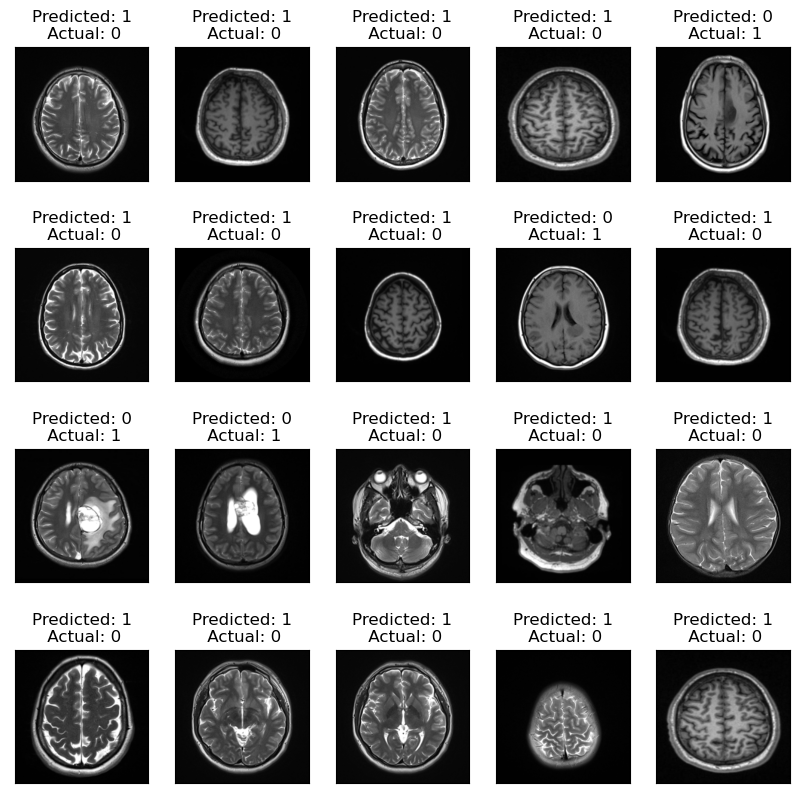

In [67]:
num_images = 20
columns = 5
rows = 4

fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 10))

ax = ax.flatten()

for i, image in enumerate(X_test[incorrect_photos][:num_images]):
    ax[i].imshow(image, cmap='gray')

    # Get predicted label
    prediction = y_predict[incorrect_photos][i]
    
    # Get actual label
    actual = y_test[incorrect_photos].iloc[i]
    
    # Set the title of the subplot
    ax[i].set_title(f"Predicted: {prediction}\n Actual: {actual}")
    
    # Hide the x and y ticks to make 
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])

plt.show()
fig.tight_layout()

In [72]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
CNN_model.save('saved_model/CNN_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/CNN_model\assets
